# Mounting Drive and Directory

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import os
os.chdir('/content/drive/MyDrive/CSE445/Project')

# Importing Libraries

In [7]:
import math #mathematical computation
import pandas as pd #dataframe
import numpy as np #mathematical computations
import matplotlib.pyplot as plt #visualization
import matplotlib
import joblib #saving the model
import seaborn as sns #visualization
import json #exporting columns
import pickle #saving the model
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression #Linear Regression
from sklearn.linear_model import Lasso #Lasso Regression
from sklearn.tree import DecisionTreeRegressor #Decision Tree Regression
from sklearn.ensemble import RandomForestRegressor #Random Forest Regression
from xgboost import XGBRegressor # XGBoost Regression
from sklearn.model_selection import train_test_split #Splitting the dataset into training and testing
from sklearn.model_selection import ShuffleSplit #Random shuffling
from sklearn.model_selection import cross_val_score #Score cross validation
from sklearn.model_selection import cross_validate #Score cross validation
from sklearn.model_selection import GridSearchCV #Hyper parameter tuning
from statistics import stdev
from warnings import simplefilter #Filtering warnings

import warnings
warnings.filterwarnings('ignore')

# Loading Dataset 

In [8]:
raw_dataset = pd.read_excel('Vaccine_Hesitancy_Dataset.xlsx') #loading the raw_dataset from excel sheet
pd.set_option("display.max_columns", None) #showing all columns in output
raw_dataset.head()

,ID1,S1_Address1,S2_Age1,S3_Sex1,S5_Education1,S6_Employement1,S6_Employement2,S7_Monthly_F_income1,S8_Location1,S9_Marital_Status1,S10_Diabetis1,S10_HTN1,S10_CKD1,S10_CRD1,S10_CHD1,S10_Cancer1,S10_others1,S11_Own_house1,S12_Motor_cycle_CNG1,S12_Rickshaw_Van1,S12_Pickup_Bus_Car1,S13_television1,S14_toilet1,S15_matarial_house1,R1_perception_COVID_191,R2_odds_of_you_infected_COVID_191,R3_you_affected_COVID_191,R4_Comply_instruction_government1,R5_mitigation_measures_taken_govenment1,A1_vaccine_acceptance1,A2_trust_health_system1,A3_Trust_information_regarding_media1,A4_adverse_effected_COVID_191,F1_pay_for_vaccine1,F2_maximum_dose1,Datafrom,Agegroup,Comorbidity,vaccine_acceptance
0,MIN1,Rajshahi,38.0,Female,4.11-12,Doctor/teacher,HCW,3.20001-50000,Semi-urban,Married,No,No,No,No,No,No,No,1.0,0.0,0.0,0.0,1.0,1.0,2.0,Infections are increasing day by day,1.Low,No,3.High,1.Low,3.Intend to vaccinate,3.High,Low,NaN,Intend to pay,Single,MIN,2.31-40,No,0
1,MIN2,Rajshahi,36.0,Male,4.11-12,Doctor/teacher,HCW,3.20001-50000,Semi-urban,Married,No,No,No,No,No,No,No,0.0,1.0,0.0,0.0,1.0,1.0,2.0,Infections are increasing day by day,1.Low,No,3.High,2.Moderate,3.Intend to vaccinate,3.High,Moderate,NaN,Intend to pay,any,MIN,2.31-40,No,0
2,MIN3,Rajshahi,43.0,Female,3.6-10,Housewife,Housewife,1.<=10000,Rural,Married,No,No,No,No,No,No,No,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Infections are increasing day by day,1.Low,No,3.High,2.Moderate,3.Intend to vaccinate,3.High,Low,NaN,Free,Single,MIN,3.41-50,No,0
3,MIN4,Rajshahi,48.0,Male,2.1-5,Agriculture,Agriculture,2.10001-20000,Rural,Married,No,No,No,No,No,No,No,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Infections are increasing day by day,1.Low,No,2.Moderate,2.Moderate,3.Intend to vaccinate,3.High,Moderate,NaN,Free,Single,MIN,3.41-50,No,0
4,MIN5,Rajshahi,30.0,Female,4.11-12,Day-labor,Day-labor,2.10001-20000,Semi-urban,Married,No,No,No,No,No,No,No,1.0,0.0,0.0,0.0,0.0,1.0,2.0,Infections are increasing day by day,3.High,No,3.High,2.Moderate,3.Intend to vaccinate,3.High,Low,NaN,Intend to pay,any,MIN,1.<=30,No,0


# Data Preprocessing

In [ ]:
df = raw_dataset

df = df.drop("ID1", axis=1)
df = df.drop("Datafrom", axis=1)

df.dropna(axis=1, how='all')
df.dropna(axis=0, how='all')

df['S5_Education1'] = df['S5_Education1'].str.slice(start=2)
df['S7_Monthly_F_income1'] = df['S7_Monthly_F_income1'].str.slice(start=2)
df['A1_vaccine_acceptance1'] = df['A1_vaccine_acceptance1'].str.slice(start=2)
df['A2_trust_health_system1'] = df['A2_trust_health_system1'].str.slice(start=2)
df['Agegroup'] = df['Agegroup'].str.slice(start=2)
df['R4_Comply_instruction_government1'] = df['R4_Comply_instruction_government1'].str.slice(start=2)
df['R2_odds_of_you_infected_COVID_191'] = df['R2_odds_of_you_infected_COVID_191'].str.slice(start=2)
df['R5_mitigation_measures_taken_govenment1'] = df['R5_mitigation_measures_taken_govenment1'].str.slice(start=2)
df.head()

,S1_Address1,S2_Age1,S3_Sex1,S5_Education1,S6_Employement1,S6_Employement2,S7_Monthly_F_income1,S8_Location1,S9_Marital_Status1,S10_Diabetis1,S10_HTN1,S10_CKD1,S10_CRD1,S10_CHD1,S10_Cancer1,S10_others1,S11_Own_house1,S12_Motor_cycle_CNG1,S12_Rickshaw_Van1,S12_Pickup_Bus_Car1,S13_television1,S14_toilet1,S15_matarial_house1,R1_perception_COVID_191,R2_odds_of_you_infected_COVID_191,R3_you_affected_COVID_191,R4_Comply_instruction_government1,R5_mitigation_measures_taken_govenment1,A1_vaccine_acceptance1,A2_trust_health_system1,A3_Trust_information_regarding_media1,A4_adverse_effected_COVID_191,F1_pay_for_vaccine1,F2_maximum_dose1,Agegroup,Comorbidity,vaccine_acceptance
0,Rajshahi,38.0,Female,11-12,Doctor/teacher,HCW,20001-50000,Semi-urban,Married,No,No,No,No,No,No,No,1.0,0.0,0.0,0.0,1.0,1.0,2.0,Infections are increasing day by day,Low,No,High,Low,Intend to vaccinate,High,Low,NaN,Intend to pay,Single,31-40,No,0
1,Rajshahi,36.0,Male,11-12,Doctor/teacher,HCW,20001-50000,Semi-urban,Married,No,No,No,No,No,No,No,0.0,1.0,0.0,0.0,1.0,1.0,2.0,Infections are increasing day by day,Low,No,High,Moderate,Intend to vaccinate,High,Moderate,NaN,Intend to pay,any,31-40,No,0
2,Rajshahi,43.0,Female,6-10,Housewife,Housewife,<=10000,Rural,Married,No,No,No,No,No,No,No,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Infections are increasing day by day,Low,No,High,Moderate,Intend to vaccinate,High,Low,NaN,Free,Single,41-50,No,0
3,Rajshahi,48.0,Male,1-5,Agriculture,Agriculture,10001-20000,Rural,Married,No,No,No,No,No,No,No,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Infections are increasing day by day,Low,No,Moderate,Moderate,Intend to vaccinate,High,Moderate,NaN,Free,Single,41-50,No,0
4,Rajshahi,30.0,Female,11-12,Day-labor,Day-labor,10001-20000,Semi-urban,Married,No,No,No,No,No,No,No,1.0,0.0,0.0,0.0,0.0,1.0,2.0,Infections are increasing day by day,High,No,High,Moderate,Intend to vaccinate,High,Low,NaN,Intend to pay,any,<=30,No,0


In [ ]:
new_columns =['Address', 'Age', 'Sex', 'Education', 'Employment1','Employment2','Monthly Income', 'Location','Marital Status','Diabetes','Hypertension','Chronic Kidney Disease','Chronic Respiratory Disease',
           'Chronic Heart Disease','Cancer','Other Disease','Own House','Motor Cycle','Rickshaw_Van','Pickup_Bus_Car','Television',
          'Toilet Facilities','House Material','Perception_Covid19','Odds_infected','COVID19 Infection','Comply_Instruction','Mitigation_Measures',
          'Vaccine_Acceptance','Trust_HealthSystem','Trust_Media','Adverse_Vaccine','Payment','MaxDose Willingness','AgeGroup',
          'Comorbidity','Vaccine Acceptance']
df.columns = new_columns
df.head()

,Address,Age,Sex,Education,Employment1,Employment2,Monthly Income,Location,Marital Status,Diabetes,Hypertension,Chronic Kidney Disease,Chronic Respiratory Disease,Chronic Heart Disease,Cancer,Other Disease,Own House,Motor Cycle,Rickshaw_Van,Pickup_Bus_Car,Television,Toilet Facilities,House Material,Perception_Covid19,Odds_infected,COVID19 Infection,Comply_Instruction,Mitigation_Measures,Vaccine_Acceptance,Trust_HealthSystem,Trust_Media,Adverse_Vaccine,Payment,MaxDose Willingness,AgeGroup,Comorbidity,Vaccine Acceptance
0,Rajshahi,38.0,Female,11-12,Doctor/teacher,HCW,20001-50000,Semi-urban,Married,No,No,No,No,No,No,No,1.0,0.0,0.0,0.0,1.0,1.0,2.0,Infections are increasing day by day,Low,No,High,Low,Intend to vaccinate,High,Low,NaN,Intend to pay,Single,31-40,No,0
1,Rajshahi,36.0,Male,11-12,Doctor/teacher,HCW,20001-50000,Semi-urban,Married,No,No,No,No,No,No,No,0.0,1.0,0.0,0.0,1.0,1.0,2.0,Infections are increasing day by day,Low,No,High,Moderate,Intend to vaccinate,High,Moderate,NaN,Intend to pay,any,31-40,No,0
2,Rajshahi,43.0,Female,6-10,Housewife,Housewife,<=10000,Rural,Married,No,No,No,No,No,No,No,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Infections are increasing day by day,Low,No,High,Moderate,Intend to vaccinate,High,Low,NaN,Free,Single,41-50,No,0
3,Rajshahi,48.0,Male,1-5,Agriculture,Agriculture,10001-20000,Rural,Married,No,No,No,No,No,No,No,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Infections are increasing day by day,Low,No,Moderate,Moderate,Intend to vaccinate,High,Moderate,NaN,Free,Single,41-50,No,0
4,Rajshahi,30.0,Female,11-12,Day-labor,Day-labor,10001-20000,Semi-urban,Married,No,No,No,No,No,No,No,1.0,0.0,0.0,0.0,0.0,1.0,2.0,Infections are increasing day by day,High,No,High,Moderate,Intend to vaccinate,High,Low,NaN,Intend to pay,any,<=30,No,0


In [ ]:
for column in new_columns:
  if(df[column].dtype == object):
    df[column] = df[column].str.strip()


In [ ]:
df.Employment2 = df.Employment2.str.replace('0.Job','Job')

In [ ]:
df.drop(['Vaccine Acceptance'], axis=1) #dropped the previous predicted vaccine acceptance column
                                        #only keeping the original vaccice acceptance data from the survey

,Address,Age,Sex,Education,Employment1,Employment2,Monthly Income,Location,Marital Status,Diabetes,Hypertension,Chronic Kidney Disease,Chronic Respiratory Disease,Chronic Heart Disease,Cancer,Other Disease,Own House,Motor Cycle,Rickshaw_Van,Pickup_Bus_Car,Television,Toilet Facilities,House Material,Perception_Covid19,Odds_infected,COVID19 Infection,Comply_Instruction,Mitigation_Measures,Vaccine_Acceptance,Trust_HealthSystem,Trust_Media,Adverse_Vaccine,Payment,MaxDose Willingness,AgeGroup,Comorbidity
0,Rajshahi,38.0,Female,11-12,Doctor/teacher,HCW,20001-50000,Semi-urban,Married,No,No,No,No,No,No,No,1.0,0.0,0.0,0.0,1.0,1.0,2.0,Infections are increasing day by day,Low,No,High,Low,Intend to vaccinate,High,Low,NaN,Intend to pay,Single,31-40,No
1,Rajshahi,36.0,Male,11-12,Doctor/teacher,HCW,20001-50000,Semi-urban,Married,No,No,No,No,No,No,No,0.0,1.0,0.0,0.0,1.0,1.0,2.0,Infections are increasing day by day,Low,No,High,Moderate,Intend to vaccinate,High,Moderate,NaN,Intend to pay,any,31-40,No
2,Rajshahi,43.0,Female,6-10,Housewife,Housewife,<=10000,Rural,Married,No,No,No,No,No,No,No,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Infections are increasing day by day,Low,No,High,Moderate,Intend to vaccinate,High,Low,NaN,Free,Single,41-50,No
3,Rajshahi,48.0,Male,1-5,Agriculture,Agriculture,10001-20000,Rural,Married,No,No,No,No,No,No,No,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Infections are increasing day by day,Low,No,Moderate,Moderate,Intend to vaccinate,High,Moderate,NaN,Free,Single,41-50,No
4,Rajshahi,30.0,Female,11-12,Day-labor,Day-labor,10001-20000,Semi-urban,Married,No,No,No,No,No,No,No,1.0,0.0,0.0,0.0,0.0,1.0,2.0,Infections are increasing day by day,High,No,High,Moderate,Intend to vaccinate,High,Low,NaN,Intend to pay,any,<=30,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3642,Dhaka,22.0,Female,6-10,Housewife,Housewife,10001-20000,Slum,Married,No,No,No,No,No,No,No,0.0,0.0,0.0,0.0,1.0,1.0,1.0,NaN,NaN,No,Moderate,NaN,Intend to vaccinate,Moderate,High,NaN,Free,NaN,<=30,No
3643,Dhaka,25.0,Male,6-10,Day-labor,Day-labor,10001-20000,Slum,Married,No,No,No,No,No,No,No,0.0,0.0,0.0,0.0,1.0,1.0,1.0,NaN,NaN,No,Moderate,NaN,Intend to vaccinate,Moderate,Moderate,NaN,Free,NaN,<=30,No
3644,Dhaka,36.0,Female,No Schooling,Day-labor,Day-labor,<=10000,Slum,Married,No,No,No,No,No,No,No,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,NaN,No,Moderate,NaN,Intend to vaccinate,High,High,NaN,Free,NaN,31-40,No
3645,Dhaka,32.0,Male,1-5,Day-labor,Day-labor,10001-20000,Slum,Married,No,No,No,No,No,No,No,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,NaN,No,High,NaN,Intend to vaccinate,Moderate,Moderate,NaN,Free,NaN,31-40,No


# Exploratory Data Analysis

In [ ]:
df.head()

,Address,Age,Sex,Education,Employment1,Employment2,Monthly Income,Location,Marital Status,Diabetes,Hypertension,Chronic Kidney Disease,Chronic Respiratory Disease,Chronic Heart Disease,Cancer,Other Disease,Own House,Motor Cycle,Rickshaw_Van,Pickup_Bus_Car,Television,Toilet Facilities,House Material,Perception_Covid19,Odds_infected,COVID19 Infection,Comply_Instruction,Mitigation_Measures,Vaccine_Acceptance,Trust_HealthSystem,Trust_Media,Adverse_Vaccine,Payment,MaxDose Willingness,AgeGroup,Comorbidity,Vaccine Acceptance
0,Rajshahi,38.0,Female,11-12,Doctor/teacher,HCW,20001-50000,Semi-urban,Married,No,No,No,No,No,No,No,1.0,0.0,0.0,0.0,1.0,1.0,2.0,Infections are increasing day by day,Low,No,High,Low,Intend to vaccinate,High,Low,NaN,Intend to pay,Single,31-40,No,0
1,Rajshahi,36.0,Male,11-12,Doctor/teacher,HCW,20001-50000,Semi-urban,Married,No,No,No,No,No,No,No,0.0,1.0,0.0,0.0,1.0,1.0,2.0,Infections are increasing day by day,Low,No,High,Moderate,Intend to vaccinate,High,Moderate,NaN,Intend to pay,any,31-40,No,0
2,Rajshahi,43.0,Female,6-10,Housewife,Housewife,<=10000,Rural,Married,No,No,No,No,No,No,No,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Infections are increasing day by day,Low,No,High,Moderate,Intend to vaccinate,High,Low,NaN,Free,Single,41-50,No,0
3,Rajshahi,48.0,Male,1-5,Agriculture,Agriculture,10001-20000,Rural,Married,No,No,No,No,No,No,No,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Infections are increasing day by day,Low,No,Moderate,Moderate,Intend to vaccinate,High,Moderate,NaN,Free,Single,41-50,No,0
4,Rajshahi,30.0,Female,11-12,Day-labor,Day-labor,10001-20000,Semi-urban,Married,No,No,No,No,No,No,No,1.0,0.0,0.0,0.0,0.0,1.0,2.0,Infections are increasing day by day,High,No,High,Moderate,Intend to vaccinate,High,Low,NaN,Intend to pay,any,<=30,No,0


In [ ]:
df.isnull().any()

Address                        False
Age                             True
Sex                             True
Education                       True
Employment1                     True
Employment2                     True
Monthly Income                  True
Location                       False
Marital Status                 False
Diabetes                        True
Hypertension                    True
Chronic Kidney Disease          True
Chronic Respiratory Disease     True
Chronic Heart Disease           True
Cancer                          True
Other Disease                   True
Own House                       True
Motor Cycle                     True
Rickshaw_Van                    True
Pickup_Bus_Car                  True
Television                      True
Toilet Facilities               True
House Material                  True
Perception_Covid19              True
Odds_infected                   True
COVID19 Infection               True
Comply_Instruction              True
M

In [ ]:
df.isnull().sum()

Address                           0
Age                               2
Sex                               1
Education                        20
Employment1                     784
Employment2                     784
Monthly Income                   29
Location                          0
Marital Status                    0
Diabetes                          4
Hypertension                      3
Chronic Kidney Disease            3
Chronic Respiratory Disease       3
Chronic Heart Disease             3
Cancer                            3
Other Disease                     3
Own House                         2
Motor Cycle                       6
Rickshaw_Van                      6
Pickup_Bus_Car                    6
Television                        2
Toilet Facilities                 2
House Material                   10
Perception_Covid19               93
Odds_infected                    92
COVID19 Infection                 3
Comply_Instruction                4
Mitigation_Measures         

In [ ]:
df.Address.unique()

array(['Rajshahi', 'Rangpur', 'Dhaka', 'Khulna', 'Nilphamari',
       'Lalmonirhat', 'Kurigarm', 'Gaibandha', 'Dinajpur', 'Panchagarh',
       'Bogura', 'Kushtia', 'Chottogram', 'Meherpur', 'Doulatpur',
       'Kushita', 'Jamalpur', 'Savar', 'Pabna', 'Laxmipur', 'Barishal',
       'Gazipur', 'Narayanganj', 'Manikganj', 'Kishoregonj', 'Shariatpur',
       'Kishoreganj', 'Gopalganj', 'Tangail', 'Kishorganj', 'pabna',
       'jamalpur', 'kustia', 'potuakhali', 'pakshi', 'chuadanga',
       'Potuakhali', 'Magura', 'Satkhira', 'Borguna', 'Habiganj',
       'Sirajgonj', 'Sherpur', 'Sirajganj', 'Narsingdi', 'Pirojpur'],
      dtype=object)

In [ ]:
df.Education.unique()

array(['11-12', '6-10', '1-5', 'No Schooling', '>12', nan], dtype=object)

In [ ]:
df.Employment1.unique()

array(['Doctor/teacher', 'Housewife', 'Agriculture', 'Day-labor',
       'Business', 'Job', 'Unemployed', 'Student', 'Retired', nan],
      dtype=object)

In [ ]:
df.Employment2.unique()

array(['HCW', 'Housewife', 'Agriculture', 'Day-labor', 'Business', 'Job',
       'Not working', nan], dtype=object)

In [ ]:
df["Address"].value_counts()

Rajshahi       685
Rangpur        675
Dhaka          534
Pirojpur       412
Dinajpur       384
Jamalpur       249
Khulna         175
Chottogram     103
Nilphamari      82
Narsingdi       73
Satkhira        65
Kushtia         33
Lalmonirhat     30
Gaibandha       25
Bogura          15
Panchagarh      15
Kurigarm        12
pabna           10
Narayanganj      9
Gazipur          8
Sirajganj        7
Laxmipur         5
Manikganj        4
Pabna            3
Doulatpur        3
Savar            3
Kishoregonj      3
Barishal         2
Meherpur         2
Kishorganj       2
kustia           2
potuakhali       2
Borguna          2
Kushita          1
Sherpur          1
Sirajgonj        1
Habiganj         1
pakshi           1
Magura           1
Potuakhali       1
chuadanga        1
jamalpur         1
Tangail          1
Gopalganj        1
Kishoreganj      1
Shariatpur       1
Name: Address, dtype: int64

In [ ]:
df["Education"].value_counts()

6-10            1031
>12              890
11-12            650
1-5              589
No Schooling     467
Name: Education, dtype: int64

In [ ]:
df.head(10)

,Address,Age,Sex,Education,Employment1,Employment2,Monthly Income,Location,Marital Status,Diabetes,Hypertension,Chronic Kidney Disease,Chronic Respiratory Disease,Chronic Heart Disease,Cancer,Other Disease,Own House,Motor Cycle,Rickshaw_Van,Pickup_Bus_Car,Television,Toilet Facilities,House Material,Perception_Covid19,Odds_infected,COVID19 Infection,Comply_Instruction,Mitigation_Measures,Vaccine_Acceptance,Trust_HealthSystem,Trust_Media,Adverse_Vaccine,Payment,MaxDose Willingness,AgeGroup,Comorbidity,Vaccine Acceptance
0,Rajshahi,38.0,Female,11-12,Doctor/teacher,HCW,20001-50000,Semi-urban,Married,No,No,No,No,No,No,No,1.0,0.0,0.0,0.0,1.0,1.0,2.0,Infections are increasing day by day,Low,No,High,Low,Intend to vaccinate,High,Low,NaN,Intend to pay,Single,31-40,No,0
1,Rajshahi,36.0,Male,11-12,Doctor/teacher,HCW,20001-50000,Semi-urban,Married,No,No,No,No,No,No,No,0.0,1.0,0.0,0.0,1.0,1.0,2.0,Infections are increasing day by day,Low,No,High,Moderate,Intend to vaccinate,High,Moderate,NaN,Intend to pay,any,31-40,No,0
2,Rajshahi,43.0,Female,6-10,Housewife,Housewife,<=10000,Rural,Married,No,No,No,No,No,No,No,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Infections are increasing day by day,Low,No,High,Moderate,Intend to vaccinate,High,Low,NaN,Free,Single,41-50,No,0
3,Rajshahi,48.0,Male,1-5,Agriculture,Agriculture,10001-20000,Rural,Married,No,No,No,No,No,No,No,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Infections are increasing day by day,Low,No,Moderate,Moderate,Intend to vaccinate,High,Moderate,NaN,Free,Single,41-50,No,0
4,Rajshahi,30.0,Female,11-12,Day-labor,Day-labor,10001-20000,Semi-urban,Married,No,No,No,No,No,No,No,1.0,0.0,0.0,0.0,0.0,1.0,2.0,Infections are increasing day by day,High,No,High,Moderate,Intend to vaccinate,High,Low,NaN,Intend to pay,any,<=30,No,0
5,Rajshahi,66.0,Male,1-5,Agriculture,Agriculture,<=10000,Rural,Married,No,No,No,Yes,No,No,No,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Infections are increasing day by day,Low,No,High,Moderate,Intend to vaccinate,High,Moderate,NaN,Free,Double dose,60+,Yes,0
6,Rajshahi,29.0,Female,6-10,Housewife,Housewife,10001-20000,Rural,Married,No,No,No,No,No,No,No,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Infections are increasing day by day,Low,No,High,Low,Intend to vaccinate,High,Moderate,NaN,Free,any,<=30,No,0
7,Rajshahi,28.0,Male,11-12,Day-labor,Day-labor,10001-20000,0.Urban,Married,No,No,No,No,No,No,No,0.0,1.0,0.0,0.0,1.0,1.0,2.0,Infections are increasing day by day,High,No,High,High,Intend to vaccinate,High,Moderate,NaN,Intend to pay,Double dose,<=30,No,0
8,Rajshahi,67.0,Male,11-12,Agriculture,Agriculture,10001-20000,Rural,Married,No,No,No,No,No,Yes,No,1.0,0.0,0.0,0.0,0.0,0.0,1.0,Infections are increasing day by day,Low,No,High,Moderate,Intend to vaccinate,High,High,NaN,Free,any,60+,Yes,0
9,Rajshahi,76.0,Male,1-5,Agriculture,Agriculture,10001-20000,Rural,Married,Yes,No,No,No,No,No,No,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Infections are increasing day by day,Low,No,High,Moderate,Intend to vaccinate,High,Low,NaN,Free,any,60+,Yes,0


In [ ]:
df.nunique()

Address                        46
Age                            66
Sex                             2
Education                       5
Employment1                     9
Employment2                     7
Monthly Income                  5
Location                        4
Marital Status                  3
Diabetes                        2
Hypertension                    2
Chronic Kidney Disease          2
Chronic Respiratory Disease     2
Chronic Heart Disease           2
Cancer                          2
Other Disease                   2
Own House                       2
Motor Cycle                     2
Rickshaw_Van                    2
Pickup_Bus_Car                  2
Television                      2
Toilet Facilities               2
House Material                  3
Perception_Covid19              8
Odds_infected                   3
COVID19 Infection               2
Comply_Instruction              3
Mitigation_Measures             3
Vaccine_Acceptance              3
Trust_HealthSy

In [ ]:
df.Perception_Covid19.unique()
df['Perception_Covid19'].value_counts()

Infections are increasing day by day              1555
The rate of infection is the same as before        966
The rate of infection is decreasing day by day     909
1 | Infections are increasing day by day           115
1.infection                                          6
4                                                    1
1.infectionHigh                                      1
Brick                                                1
Name: Perception_Covid19, dtype: int64

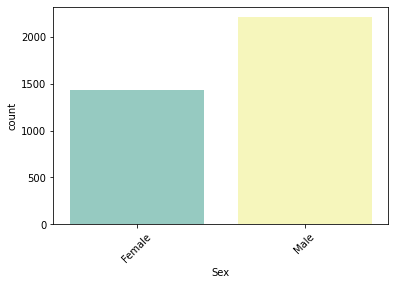

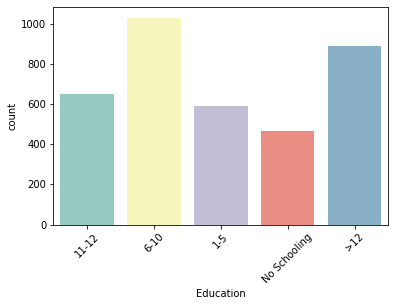

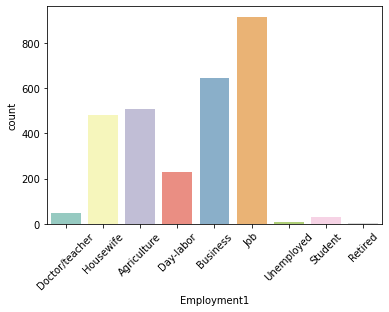

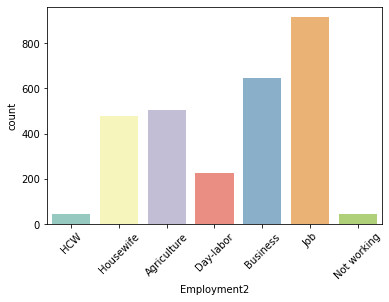

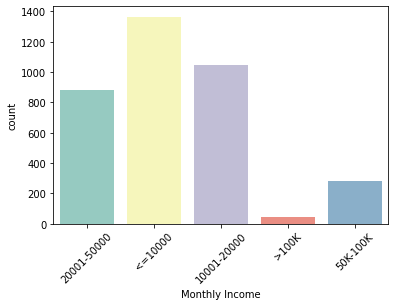

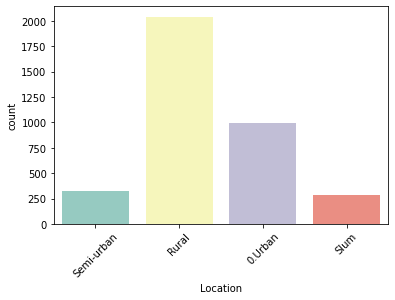

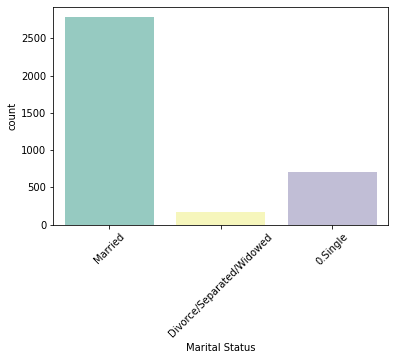

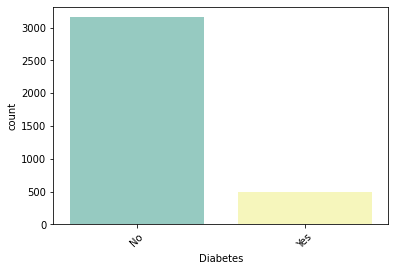

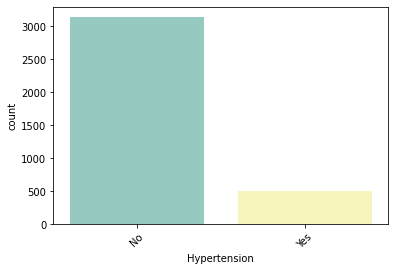

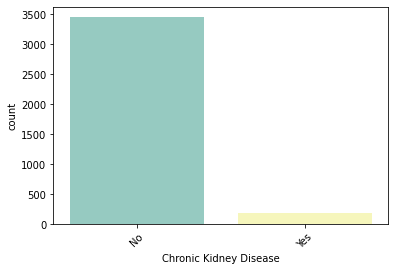

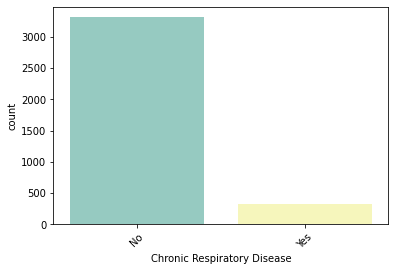

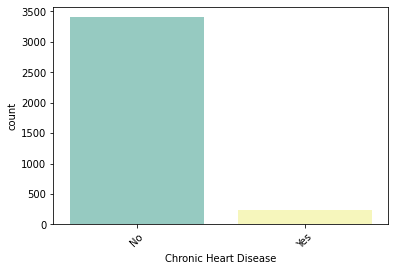

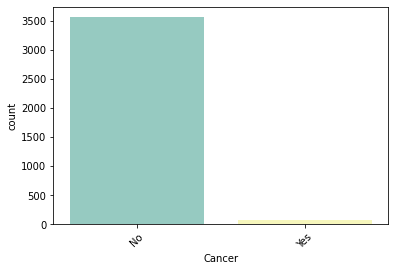

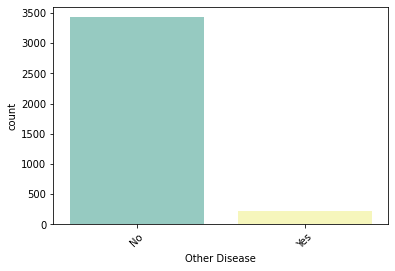

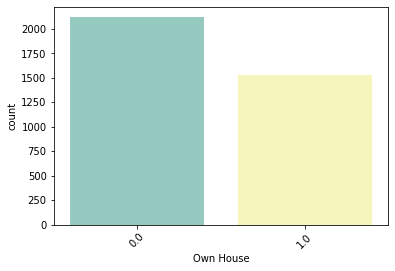

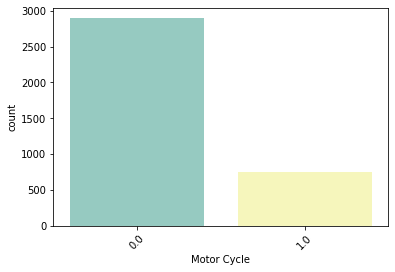

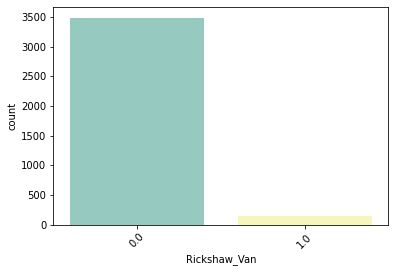

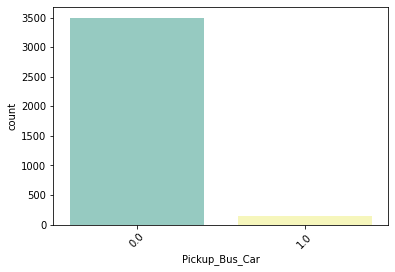

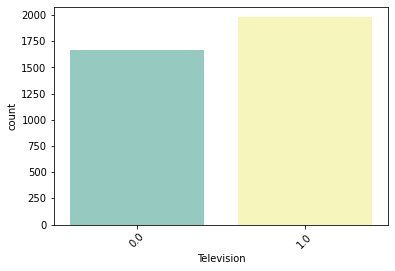

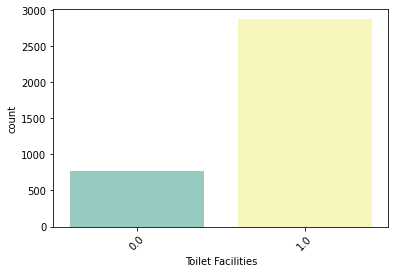

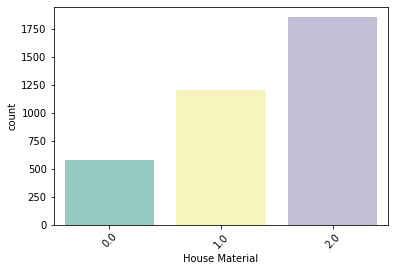

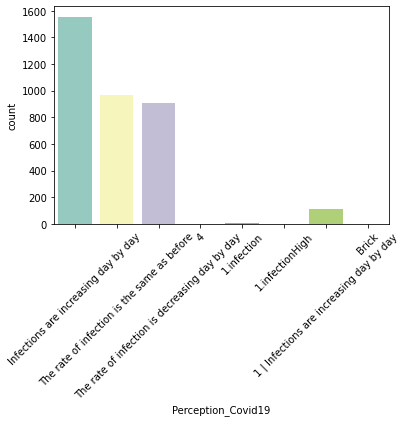

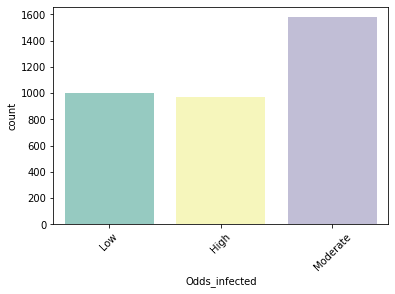

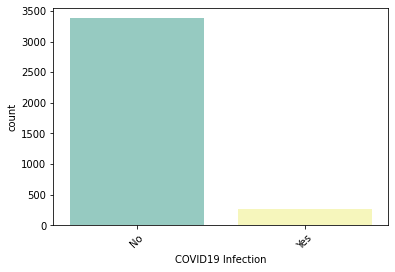

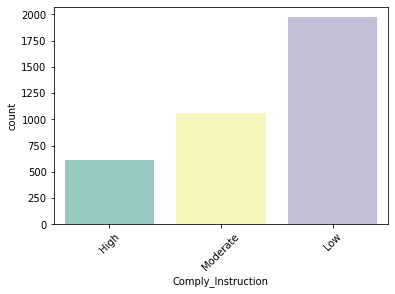

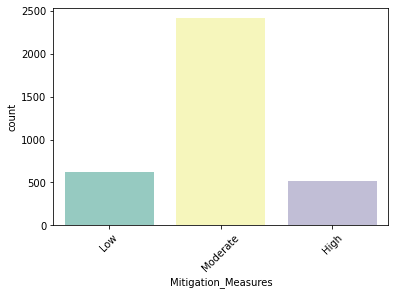

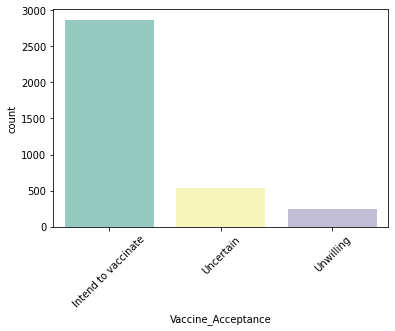

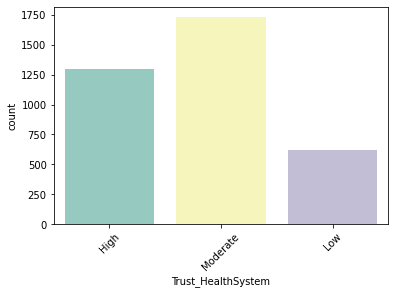

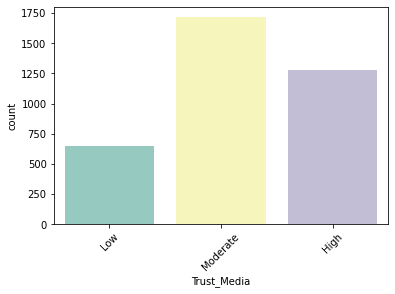

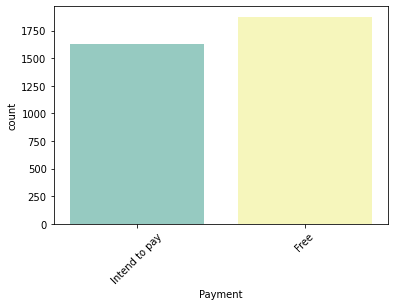

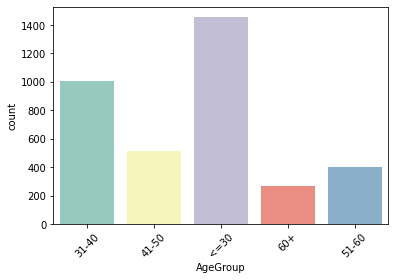

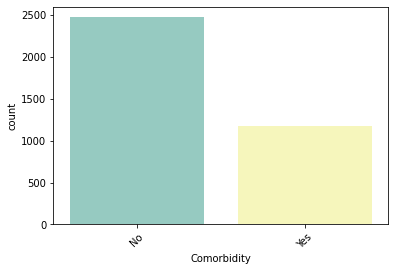

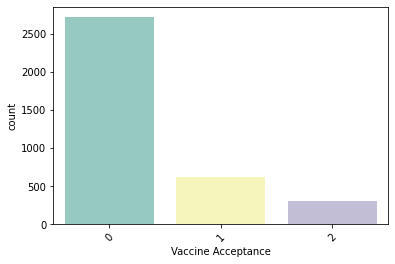

In [ ]:
features = new_columns
features.remove('Address')
features.remove('Age')
features.remove('Adverse_Vaccine')
features.remove('MaxDose Willingness')


for f in features:
    sns.countplot(x = f, data = df, palette = 'Set3')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
df.nunique()

Address                        46
Age                            66
Sex                             2
Education                       5
Employment1                     9
Employment2                     7
Monthly Income                  5
Location                        4
Marital Status                  3
Diabetes                        2
Hypertension                    2
Chronic Kidney Disease          2
Chronic Respiratory Disease     2
Chronic Heart Disease           2
Cancer                          2
Other Disease                   2
Own House                       2
Motor Cycle                     2
Rickshaw_Van                    2
Pickup_Bus_Car                  2
Television                      2
Toilet Facilities               2
House Material                  3
Perception_Covid19              8
Odds_infected                   3
COVID19 Infection               2
Comply_Instruction              3
Mitigation_Measures             3
Vaccine_Acceptance              3
Trust_HealthSy

In [13]:
# Investigate all the elements whithin each Feature 
df1 = raw_dataset

df1 = df1.drop("ID1", axis=1)
df1 = df1.drop("Datafrom", axis=1)

df1.dropna(axis=1, how='all')
df1.dropna(axis=0, how='all')

df1['S5_Education1'] = df1['S5_Education1'].str.slice(stop=1)
df1['S7_Monthly_F_income1'] = df1['S7_Monthly_F_income1'].str.slice(stop=1)
df1['A1_vaccine_acceptance1'] = df1['A1_vaccine_acceptance1'].str.slice(stop=1)
df1['A2_trust_health_system1'] = df1['A2_trust_health_system1'].str.slice(stop=1)
df1['Agegroup'] = df1['Agegroup'].str.slice(stop=1)
df1['R4_Comply_instruction_government1'] = df1['R4_Comply_instruction_government1'].str.slice(stop=1)
df1['R2_odds_of_you_infected_COVID_191'] = df1['R2_odds_of_you_infected_COVID_191'].str.slice(stop=1)
df1['R5_mitigation_measures_taken_govenment1'] = df1['R5_mitigation_measures_taken_govenment1'].str.slice(stop=1)
df1.head()

,S1_Address1,S2_Age1,S3_Sex1,S5_Education1,S6_Employement1,S6_Employement2,S7_Monthly_F_income1,S8_Location1,S9_Marital_Status1,S10_Diabetis1,S10_HTN1,S10_CKD1,S10_CRD1,S10_CHD1,S10_Cancer1,S10_others1,S11_Own_house1,S12_Motor_cycle_CNG1,S12_Rickshaw_Van1,S12_Pickup_Bus_Car1,S13_television1,S14_toilet1,S15_matarial_house1,R1_perception_COVID_191,R2_odds_of_you_infected_COVID_191,R3_you_affected_COVID_191,R4_Comply_instruction_government1,R5_mitigation_measures_taken_govenment1,A1_vaccine_acceptance1,A2_trust_health_system1,A3_Trust_information_regarding_media1,A4_adverse_effected_COVID_191,F1_pay_for_vaccine1,F2_maximum_dose1,Agegroup,Comorbidity,vaccine_acceptance
0,Rajshahi,38.0,Female,4,Doctor/teacher,HCW,3,Semi-urban,Married,No,No,No,No,No,No,No,1.0,0.0,0.0,0.0,1.0,1.0,2.0,Infections are increasing day by day,1,No,3,1,3,3,Low,NaN,Intend to pay,Single,2,No,0
1,Rajshahi,36.0,Male,4,Doctor/teacher,HCW,3,Semi-urban,Married,No,No,No,No,No,No,No,0.0,1.0,0.0,0.0,1.0,1.0,2.0,Infections are increasing day by day,1,No,3,2,3,3,Moderate,NaN,Intend to pay,any,2,No,0
2,Rajshahi,43.0,Female,3,Housewife,Housewife,1,Rural,Married,No,No,No,No,No,No,No,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Infections are increasing day by day,1,No,3,2,3,3,Low,NaN,Free,Single,3,No,0
3,Rajshahi,48.0,Male,2,Agriculture,Agriculture,2,Rural,Married,No,No,No,No,No,No,No,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Infections are increasing day by day,1,No,2,2,3,3,Moderate,NaN,Free,Single,3,No,0
4,Rajshahi,30.0,Female,4,Day-labor,Day-labor,2,Semi-urban,Married,No,No,No,No,No,No,No,1.0,0.0,0.0,0.0,0.0,1.0,2.0,Infections are increasing day by day,3,No,3,2,3,3,Low,NaN,Intend to pay,any,1,No,0


In [14]:
for column in df1:
    unique_vals = df1[column].unique()
    nr_values = len(unique_vals)
    if nr_values < 12:
        print('The number of values for feature {}: {} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {}: {}'.format(column, nr_values))

The number of values for feature S1_Address1: 52
The number of values for feature S2_Age1: 67
The number of values for feature S3_Sex1: 3 -- ['Female' 'Male' nan]
The number of values for feature S5_Education1: 6 -- ['4' '3' '2' '1' '5' nan]
The number of values for feature S6_Employement1: 10 -- ['Doctor/teacher' 'Housewife' 'Agriculture' 'Day-labor' 'Business' 'Job'
 'Unemployed' 'Student' 'Retired' nan]
The number of values for feature S6_Employement2: 8 -- ['HCW' 'Housewife' 'Agriculture' 'Day-labor' 'Business' '0.Job'
 'Not working' nan]
The number of values for feature S7_Monthly_F_income1: 6 -- ['3' '1' '2' nan '5' '4']
The number of values for feature S8_Location1: 4 -- ['Semi-urban' 'Rural' '0.Urban' 'Slum']
The number of values for feature S9_Marital_Status1: 3 -- ['Married' 'Divorce/Separated/Widowed' '0.Single']
The number of values for feature S10_Diabetis1: 3 -- ['No' 'Yes' nan]
The number of values for feature S10_HTN1: 3 -- ['No' 'Yes' nan]
The number of values for feat